In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import nashpy as nash

# Normal Form Games

##  Definition of Normal Form Game
An  player normal form game consists of:

* A finite set of  players.

* Action set for the players: 

* Payoff functions for the players: 

This can be a large class but today we will focus on  $2 \times 2$ games.

Despite being very simple, 2 × 2 games encompass many of the strategic tensions that are studied by game theorists. In the following, we classify 2 × 2 games into some classes that correspond to some of these strategic tensions, and that help understand the outcome of learning dynamics.

We consider two-player, two-action games. We index the two players by μ∈{Row=R,Column=C} and write sμi for
the two actions of player μ, with i = 1, 2. As usual we write −μ for the opponent of player μ. When the two players
choose actions sμ and s−μ player μ receives payoff 􏰛μ(sμ,s−μ) and her opponent receives payoff 􏰛−μ(sμ,s−μ). This can ijijij
be encoded in a 2 × 2 bi-matrix of payoffs 􏰛,

$$\pmatrix{
      & \alpha^{2}_1 & \alpha^{2}_2 \\
    \alpha^{1}_1 & (a, e) & (b, g) \\
    \alpha^{1}_2 & (c, f) & (d, h) \\
}$$
        

## Coordination

These correspond to the orderings $a > c, b < d, e > g, f < h$ (coordination games), and $a < c, b > d, e < g, f > h$ (anticoordination games).


Coordination games have two pure strategy NE, one at $(\alpha^{1}_1, \alpha^{2}_1)$ and the other at $(\alpha^{1}_2, \alpha^{2}_2)$. In addition there is one mixed strategy NE. 

A well-known example of coordination is the Stag-Hunt game. 

## Anticoordination


Anticoordination games also have two pure strategy and one mixed strategy NE, but at the pure strategy NE the players choose strategies with different labels, i.e.  $(\alpha^{1}_1, \alpha^{2}_2)$ and $(\alpha^{1}_2, \alpha^{2}_1)$.

A well-known example of an anticoordination game is Chicken.

## Cyclic games.

Cyclic games. These correspond to the orderings a > c, e < g, b < d, f > h or a < c, e > g, b > d, f < h. Games of this type
are characterized by a cycle of best replies. For example, if one considers the first set of orderings, the best response to
sR1 is for Column to play sC2. In response Row would choose sR2 , Column would then play sC1, and the process would never
converge to a fixed point. 

Cyclic games have a unique mixed strategy NE and no pure strategy NE. 

The prototypical cyclic game is Matching Pennies.

## Dominance-solvable games

These comprise all 12 remaining orderings. These games have a unique pure strategy NE, which
can be obtained via elimination of dominated strategies. For instance, if a > c, e > g, b > d, f > h, the NE is (sR
1, sC
1). The
well-known Prisoners’ Dilemma is a 2 × 2 dominance-solvable game. (The dominance-solvable game shown in Table 1 is a
Prisoner Dilemma.)

## Prisoner's Dilemma

In [4]:
A = np.array([[3, 0], [5, 1]])
B = np.array([[3, 5], [0, 1]])

prisoners_dilemma = nash.Game(A, B)

prisoners_dilemma

Bi matrix game with payoff matrices:

Row player:
[[3 0]
 [5 1]]

Column player:
[[3 5]
 [0 1]]

## Stag Hunt

In [5]:
A = np.array([[4, 1], [3, 3]])
B = np.array([[4, 3], [1, 3]])

stag_hunt = nash.Game(A, B)
stag_hunt

Bi matrix game with payoff matrices:

Row player:
[[4 1]
 [3 3]]

Column player:
[[4 3]
 [1 3]]

## Matching Pennies

In [6]:
A = np.array([[1, 0], [0, 1]])
B = np.array([[0, 1], [1, 0]])

matching_pennies = nash.Game(A, B)
matching_pennies

Bi matrix game with payoff matrices:

Row player:
[[1 0]
 [0 1]]

Column player:
[[0 1]
 [1 0]]

In [5]:
payoffs_row_player = np.array([[2, 1], [3, 0]])
payoffs_col_player = np.array([[2, 3], [1, 0]])

chicken_game = nash.Game(payoffs_row_player, payoffs_col_player)
chicken_game

Bi matrix game with payoff matrices:

Row player:
[[2 1]
 [3 0]]

Column player:
[[2 3]
 [1 0]]

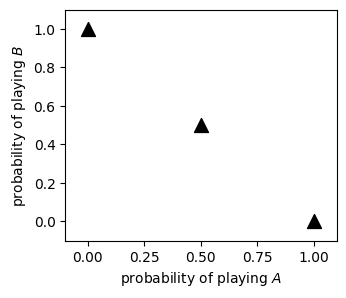

In [7]:
plot_nash(chicken_game);

## Nash

In [7]:
equilibria = matching_pennies.support_enumeration()
for eq in equilibria:
    print(eq)

(array([0.5, 0.5]), array([0.5, 0.5]))


In [8]:
equilibria = prisoners_dilemma.support_enumeration()
for eq in equilibria:
    print(eq)

(array([0., 1.]), array([0., 1.]))


In [9]:
equilibria = stag_hunt.support_enumeration()
for eq in equilibria:
    print(eq)

(array([1., 0.]), array([1., 0.]))
(array([0., 1.]), array([0., 1.]))
(array([0.66666667, 0.33333333]), array([0.66666667, 0.33333333]))


## Plot Nash

In [6]:
def plot_nash(game):

    fig, axes = plt.subplots(figsize=(3.5, 3))
    
    axes.set_ylabel("probability of playing $B$");axes.set_xlabel("probability of playing $A$");
    
    axes.set_ylim(-0.1, 1.1); axes.set_xlim(-0.1, 1.1); 
    
    equilibria = game.support_enumeration()
    
    for eq in equilibria:
        x = eq[0][0]
        y = eq[1][0]
    
        axes.scatter(x, y, color='black', marker='^', s=100)

    return fig, axes

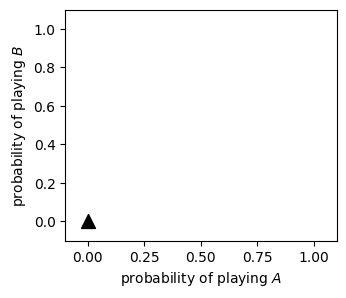

In [19]:
plot_nash(prisoners_dilemma);

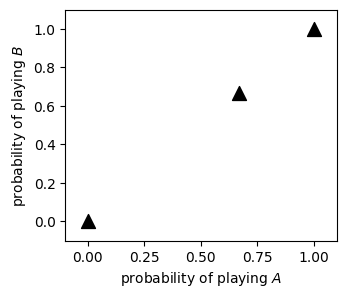

In [20]:
plot_nash(stag_hunt);

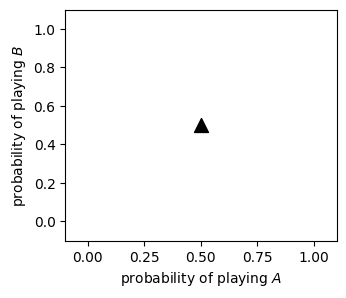

In [21]:
plot_nash(matching_pennies);